In [1]:
import pandas as pd 
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
import warnings
warnings.filterwarnings("ignore")
clf = LinearRegression()
# clf = AdaBoostRegressor()
file_name = 'C'
data = pd.read_csv(file_name+'.csv')
data.set_index('Day',inplace=True)
rolling_num = 120
data['Last_day_value'] = pd.to_numeric(data['Last_day_value'])
data['Today_value'] = pd.to_numeric(data['Today_value'])
# for i in range(rolling_num,1486):
#      data.iloc[i:i+1,3] = data.iloc[i-rolling_num:i,4].mean()   
data['Last_day_value'] = data['Today_value'].rolling(window=rolling_num).mean()
data[rolling_num:]

,Year,Month,Day_num,Last_day_value,Today_value
Day,,,,,
2015/7/2,2015,7,42187,-447.352597,-407.811909
2015/7/3,2015,7,42188,-446.935189,-418.980132
2015/7/6,2015,7,42191,-446.441210,-414.653505
2015/7/7,2015,7,42192,-446.023460,-424.852222
2015/7/8,2015,7,42193,-445.659824,-432.876122
...,...,...,...,...,...
2021/11/24,2021,11,44524,NaN,NaN
2021/11/25,2021,11,44525,NaN,NaN
2021/11/26,2021,11,44526,NaN,NaN


In [2]:
def regression(num):
    """fit model"""
    train = data[rolling_num:num]
    x_train = train.drop(train.columns[len(train.columns)-1],axis=1)
    y_train = pd.DataFrame(train[train.columns[-1]])
    test = data[num:num+1]
    x_test = test.drop(test.columns[len(test.columns)-1],axis=1)
    model = clf.fit(x_train, y_train)
    pred_value = model.predict(x_test)
    return pred_value 

In [3]:
weight_value_count = data.iloc[250:250+369]
weight_value = []
for index , row in weight_value_count.iterrows():
    weight = (row['Today_value'] - row['Last_day_value'])/row['Today_value']
    weight_value.append(weight)
weight_value

[0.030447347680293512,
 0.02442516716223345,
 0.01313115810104518,
 0.025469464314340808,
 0.024083718986425584,
 0.0004094845510516326,
 0.017390553611126066,
 0.022096890588355955,
 0.016758580372242315,
 0.016161567139896804,
 0.024376693627846963,
 0.022448402548479532,
 0.02925640224326174,
 0.020019773559364504,
 0.018327375404049343,
 0.011009380452770943,
 0.012711504742356309,
 0.009566336506163915,
 0.0119468025745191,
 0.019073412317703275,
 0.010909278132983093,
 0.013979376478755093,
 0.015214491822746085,
 0.012180380257687804,
 0.0018371027658310797,
 -0.008284105709612374,
 -0.01990332093155233,
 -0.006244522725031787,
 -0.015840530878356407,
 -0.010607916961364632,
 -0.01853693456224897,
 -0.03207737166439501,
 -0.04011118263928053,
 -0.06625864015703661,
 -0.05346912755899336,
 -0.04186090744038839,
 -0.03665131042780183,
 -0.037982563553595354,
 -0.037410599991698885,
 -0.029134167757348232,
 -0.04542840117624588,
 -0.037034820734668045,
 -0.039326911874486864,
 -0.0

In [4]:
for i in range(1437,len(data)): #  368 count
    data.iloc[i:i+1,3] = data.iloc[i-rolling_num:i,3].mean()# 赋值Last_Day_value
    pred = regression(i)
    print(pred)
    data.iloc[i:i+1,4] = pred * (1+weight_value[i-1437]) 

[[902.88919799]]
[[905.06119811]]
[[907.20464117]]
[[909.28355632]]
[[915.89194378]]
[[918.06106799]]
[[920.05847322]]
[[922.16504594]]
[[924.29500256]]
[[926.38277401]]
[[928.46377863]]
[[930.58641692]]
[[932.69338765]]
[[934.8326639]]
[[936.91511035]]
[[938.98229385]]
[[941.00365658]]
[[943.02757655]]
[[945.02835753]]
[[947.03443205]]
[[949.06974633]]
[[951.05511667]]
[[953.04784773]]
[[955.03108109]]
[[956.97264122]]
[[958.83287345]]
[[960.60940701]]
[[962.28908714]]
[[964.00981891]]
[[965.63980925]]
[[967.26701798]]
[[968.8187267]]
[[970.25111889]]
[[971.59358727]]
[[972.71011829]]
[[986.42317194]]
[[987.50739559]]
[[988.6369921]]
[[989.74058067]]
[[990.82789661]]
[[991.96888103]]
[[992.94141809]]
[[993.96635525]]
[[994.94931034]]
[[995.97652248]]
[[996.86384884]]
[[997.68410056]]
[[998.47670379]]
[[999.10025651]]
[[999.66097009]]
[[1000.10585986]]
[[1000.56192486]]
[[1000.98020035]]
[[1001.39016198]]
[[1001.81669313]]
[[1002.19637834]]
[[1002.29289436]]
[[1002.42081449]]
[[1002.59

In [5]:
data.to_csv(file_name+'_result.csv')

No handles with labels found to put in legend.


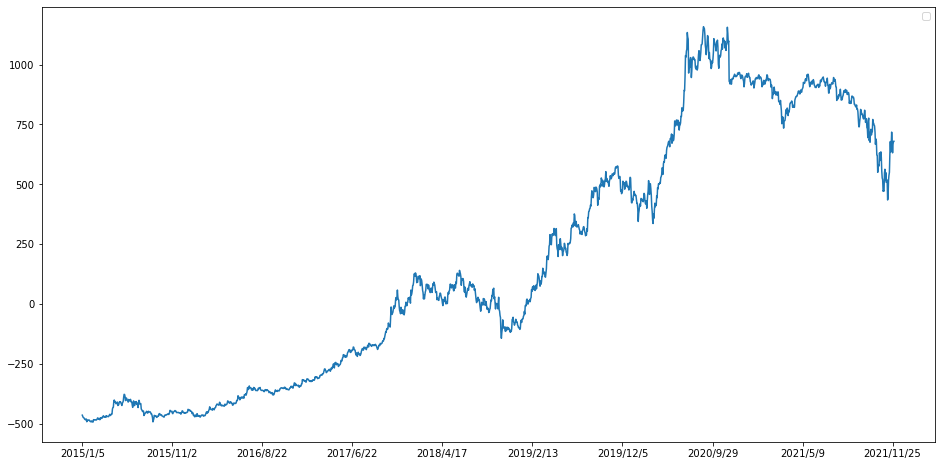

In [6]:

import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
plt.plot(data['Today_value'])
plt.xticks(data.index[::200],data.index[::200])
plt.legend()
plt.show()